In [16]:
import numpy as np
from cluster_sim.app.holes import Holes
from cluster_sim.app.grid import Grid
from cluster_sim.app.utils import get_node_coords

import os
from joblib import delayed, Parallel
import time
from analysis_funcs import algorithm1, apply_error_channel, ParallelTqdm
import networkx as nx

os.makedirs("./data", exist_ok=True)

shape = [50, 50, 200]
seed = 12345

samples = 1

# The probabilities to simulate
p_vec = np.linspace(0, 0.05, 10)

# Input vector for all jobs
jobs_input_vec = p_vec

In [17]:
def main(input_params):
    """
    Main function for parallel processing. Here, we:

    1. Create a grid of the given shape
    2. Apply the error channel to the grid
    3. Generate a RHG lattice
    4. Look at clusters of the RHG lattice
    5. Return the results

    Returns:
        - p: The input parameter for the simulation
        - percolates: The number of times percolation occurred (True: 1, False: 0)
        - times: The average time taken for the simulation
    """
    
    p = input_params

    # Sanity check: check that this is equal to the move_list on the app
    # print(np.reshape(np.argwhere(removed_nodes == True), shape=-1))
    
    
    
    # How much nodes in an RHG lattice, when no deletion errors?
    G2 = Grid(shape)
    # Generate an RHG lattice out of G
    G2, _, _ = algorithm1(G2, D=Holes(shape), removed_nodes=np.zeros(shape[0] * shape[1] * shape[2], dtype=bool), shape=shape)

    G2_nx = G2.to_networkx()
    G2_nx.remove_nodes_from(list(nx.isolates(G2_nx)))
    ideal_rhg_num_nodes = G2_nx.number_of_nodes() 

    times = np.zeros(samples)

    for i in range(samples):
        start = time.time()

        G = Grid(shape)
        removed_nodes = np.zeros(shape[0] * shape[1] * shape[2], dtype=bool)

        G, D, removed_nodes = apply_error_channel(p, seed + i, shape, removed_nodes, G)

        # Generate an RHG lattice out of G
        G, removed_nodes, offsets = algorithm1(G, D, removed_nodes, shape)

        # Remove isolated nodes.
        G_nx = G.to_networkx()
        G_nx.remove_nodes_from(list(nx.isolates(G_nx)))
        
        reconstructed_rhg_num_nodes = G_nx.number_of_nodes()
        
        print(reconstructed_rhg_num_nodes, ideal_rhg_num_nodes)

        times[i] = time.time() - start 

    return (p, reconstructed_rhg_num_nodes, ideal_rhg_num_nodes, times.mean())


In [18]:
results = ParallelTqdm(n_jobs=-1)([delayed(main)(x) for x in jobs_input_vec])
results = np.array(results)
print(results)

  0%|          | 0/10 [00:00<?, ?tasks/s]

hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [3426. 3418. 3544. 3396. 3396. 3544. 3418. 3426.]
hole locations [4867. 4825. 4836. 4932. 4932. 4836. 4825. 4867.]
hole locations [1448. 1420. 1402. 1327. 1327. 1402. 1420. 1448.]
hole locations [2782. 2694. 2813. 2796. 2796. 2813. 2694. 2782.]
hole locations [4145. 4211. 4092. 4107. 4107. 4092. 4211. 4145.]
hole locations [2023. 2065. 2119. 2059. 2059. 2119. 2065. 2023.]
hole locations [697. 696. 702. 723. 723. 702. 696. 697.]
375000 375000
360471 375000
364760 375000
370851 375000
366727 375000
362656 375000


 10%|█         | 1/10 [01:22<12:24, 82.77s/tasks]

368852 375000


 50%|█████     | 5/10 [01:23<00:36,  7.33s/tasks]

372905 375000


 80%|████████  | 8/10 [01:24<00:05,  2.86s/tasks]

hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [0. 0. 0. 0. 0. 0. 0. 0.]
hole locations [6258. 6342. 6316. 6192. 6192. 6316. 6342. 6258.]
hole locations [5610. 5439. 5622. 5620. 5620. 5622. 5439. 5610.]


 90%|█████████ | 9/10 [01:38<00:06,  6.05s/tasks]

358329 375000
356227 375000


100%|██████████| 10/10 [01:38<00:00,  9.90s/tasks]

[[0.00000000e+00 3.75000000e+05 3.75000000e+05 5.00371277e+01]
 [5.55555556e-03 3.72905000e+05 3.75000000e+05 5.11368630e+01]
 [1.11111111e-02 3.70851000e+05 3.75000000e+05 5.08400578e+01]
 [1.66666667e-02 3.68852000e+05 3.75000000e+05 5.03631482e+01]
 [2.22222222e-02 3.66727000e+05 3.75000000e+05 5.08332782e+01]
 [2.77777778e-02 3.64760000e+05 3.75000000e+05 5.31917589e+01]
 [3.33333333e-02 3.62656000e+05 3.75000000e+05 5.19935069e+01]
 [3.88888889e-02 3.60471000e+05 3.75000000e+05 5.06065581e+01]
 [4.44444444e-02 3.58329000e+05 3.75000000e+05 5.07801914e+00]
 [5.00000000e-02 3.56227000e+05 3.75000000e+05 5.22026777e+00]]


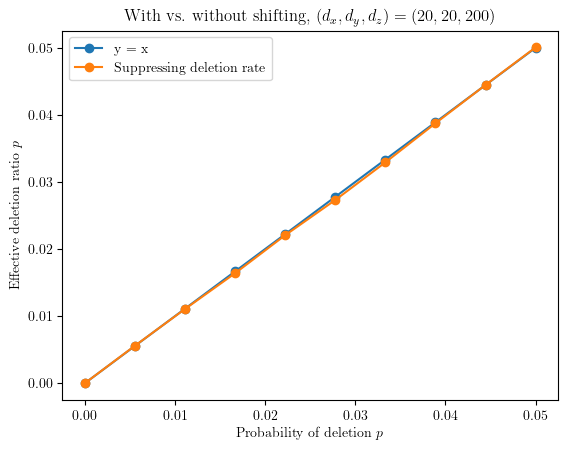

Exception ignored in: <function ResourceTracker.__del__ at 0x10827a980>
Traceback (most recent call last):
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102f52980>
Traceback (most recent call last):
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No 

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern']    
    })

plt.plot(results[:, 0], results[:,0], "o-", label="y = x")
plt.plot(results[:, 0], (1 - results[:, 1]/results[:, 2]), "o-", label="Suppressing deletion rate")
plt.xlabel(r"Probability of deletion $p$")
plt.ylabel(r"Effective deletion ratio $p$")
plt.title(r"With vs. without shifting, $(d_x, d_y, d_z)=(20, 20, 200)$")
plt.legend()
plt.savefig(f"data/effective_ratio.pdf", dpi=300)
